In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


Lets Prepare and Train the model


In [18]:
df_train = pd.read_csv('train.csv')
df_train

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365


In [5]:
df_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [19]:
df_test = pd.read_csv("test.csv")
df_test

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...
233594,1006036,P00118942,F,26-35,15,B,4+,1,8,NaN,NaN
233595,1006036,P00254642,F,26-35,15,B,4+,1,5,8.0,NaN
233596,1006036,P00031842,F,26-35,15,B,4+,1,1,5.0,12.0
233597,1006037,P00124742,F,46-50,1,C,4+,0,10,16.0,NaN


In [22]:
#Merging both files test and train
df = pd.concat([df_train, df_test], ignore_index=True)
df.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0
5,1000003,P00193542,M,26-35,15,A,3,0,1,2.0,NaN,15227.0
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,19215.0
7,1000004,P00346142,M,46-50,7,B,2,1,1,15.0,NaN,15854.0
8,1000004,P0097242,M,46-50,7,B,2,1,1,16.0,NaN,15686.0
9,1000005,P00274942,M,26-35,20,A,1,1,8,NaN,NaN,7871.0


In [23]:
df.head()


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783667 entries, 0 to 783666
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 71.7+ MB


In [25]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,7.836670e+05,783667.000000,783667.000000,783667.000000,537685.000000,237858.000000,550068.000000
mean,1.003029e+06,8.079300,0.409777,5.366196,9.844506,12.668605,9263.968713
std,1.727267e+03,6.522206,0.491793,3.878160,5.089093,4.125510,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001519e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003075e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [ ]:
df.drop(['User_ID'], axis=1, inplace=True)

In [31]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [32]:
df.drop(["Product_ID"], axis=1, inplace=True)

In [33]:
df.columns

Index(['Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [34]:
#Expressing males as 1 and Females as 0

df["Gender"] =df["Gender"].map({"F":0,"M":1})

In [35]:
df.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,0,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,0,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,0,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [36]:
#Now fixing values for age
df["Age"].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [37]:
df["Age"] =df["Age"].map({"0-17":1,"18-25":2,"26-35":3,"36-45":4,"46-50":5,
                         "51-55":6,"55+":7})

In [40]:
df.head()


,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,1,10,A,2,0,3,NaN,NaN,8370.0
1,0,1,10,A,2,0,1,6.0,14.0,15200.0
2,0,1,10,A,2,0,12,NaN,NaN,1422.0
3,0,1,10,A,2,0,12,14.0,NaN,1057.0
4,1,7,16,C,4+,0,8,NaN,NaN,7969.0


In [43]:
#Now converting city categories

df_city=pd.get_dummies(df["City_Category"],drop_first=True)

In [44]:
df_city.head()


,B,C
0,False,False
1,False,False
2,False,False
3,False,False
4,False,True


In [45]:
#Let us combine this data with the previous dataframe and delete the useless Citu_category col
pd.concat([df,df_city],axis=1)


,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,0,1,10,A,2,0,3,NaN,NaN,8370.0,False,False
1,0,1,10,A,2,0,1,6.0,14.0,15200.0,False,False
2,0,1,10,A,2,0,12,NaN,NaN,1422.0,False,False
3,0,1,10,A,2,0,12,14.0,NaN,1057.0,False,False
4,1,7,16,C,4+,0,8,NaN,NaN,7969.0,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
783662,0,3,15,B,4+,1,8,NaN,NaN,NaN,True,False
783663,0,3,15,B,4+,1,5,8.0,NaN,NaN,True,False
783664,0,3,15,B,4+,1,1,5.0,12.0,NaN,True,False
783665,0,5,1,C,4+,0,10,16.0,NaN,NaN,False,True


In [ ]:
df.drop("City_Category",axis=1,inplace=True)

Now we have fixed the data types, three attributes
Now we move to next step

In [49]:
df.isnull().sum()

Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
dtype: int64

In [54]:
#Replacing missing values
df["Product_Category_2"].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [56]:
df["Product_Category_2"].value_counts()
#This is a discrete type of data record, best way to replace values is with Mode

Product_Category_2
8.0     91317
14.0    78834
2.0     70498
16.0    61687
15.0    54114
5.0     37165
4.0     36705
6.0     23575
11.0    20230
17.0    19104
13.0    15054
9.0      8177
12.0     7801
10.0     4420
3.0      4123
18.0     4027
7.0       854
Name: count, dtype: int64

In [57]:
df["Product_Category_2"]= df["Product_Category_2"].fillna(
    df["Product_Category_2"].mode()[0])

In [58]:
df["Product_Category_2"].isnull().sum()

np.int64(0)

In [60]:
df["Product_Category_3"]= df["Product_Category_3"].fillna(
    df["Product_Category_3"].mode()[0])

In [62]:
df["Product_Category_3"].isnull().sum()

np.int64(0)

In [63]:
df.head()

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,1,10,2,0,3,8.0,16.0,8370.0
1,0,1,10,2,0,1,6.0,14.0,15200.0
2,0,1,10,2,0,12,8.0,16.0,1422.0
3,0,1,10,2,0,12,14.0,16.0,1057.0
4,1,7,16,4+,0,8,8.0,16.0,7969.0


In [69]:
df["Stay_In_Current_City_Years"].str.replace('+',' ')

0          2
1          2
2          2
3          2
4         4 
          ..
783662    4 
783663    4 
783664    4 
783665    4 
783666    4 
Name: Stay_In_Current_City_Years, Length: 783667, dtype: object

In [ ]:
#Convertion to inteeger daata type

df["Stay_In_Current_City_Years"] = df["Stay_In_Current_City_Years"].astype(int)

<Axes: xlabel='Age', ylabel='Purchase'>

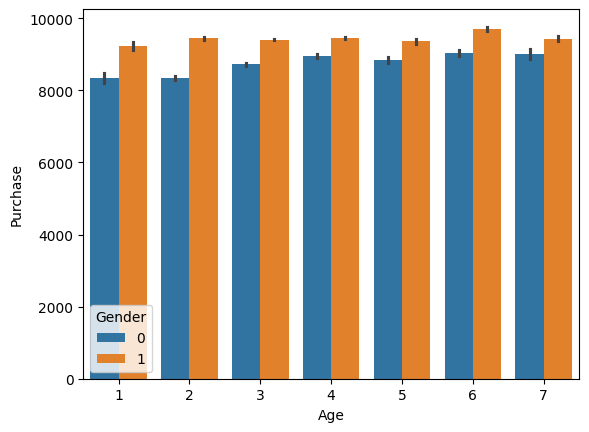

In [74]:
#Data Cleaning Part is done, now we move to data visualization
sns.barplot(x='Age',y='Purchase',hue='Gender', data=df)

WE SAW Women purchase rate is more than Men

<Axes: xlabel='Product_Category_1', ylabel='Purchase'>

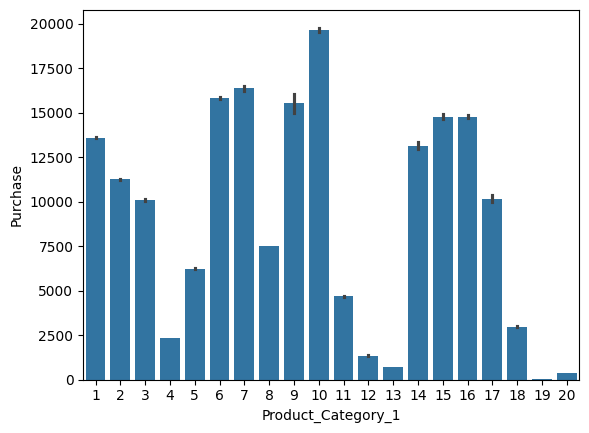

In [85]:
sns.barplot(x="Product_Category_1" , y="Purchase", data =df)

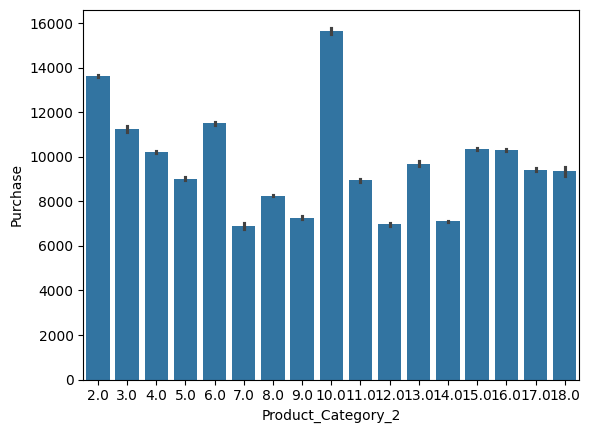

In [87]:
sns.barplot(x="Product_Category_2" , y="Purchase", data =df)

plt.show()

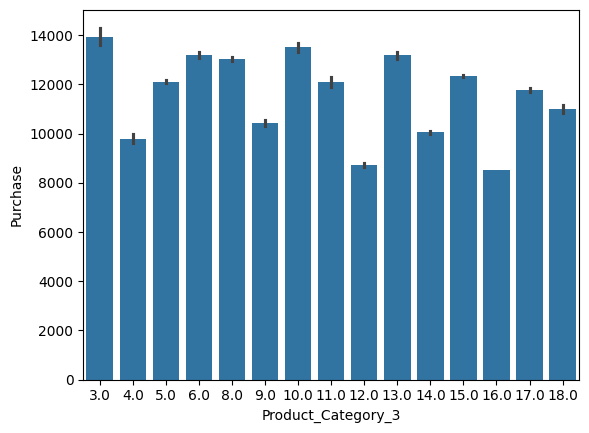

In [88]:
sns.barplot(x="Product_Category_3" , y="Purchase", data =df)
plt.show()

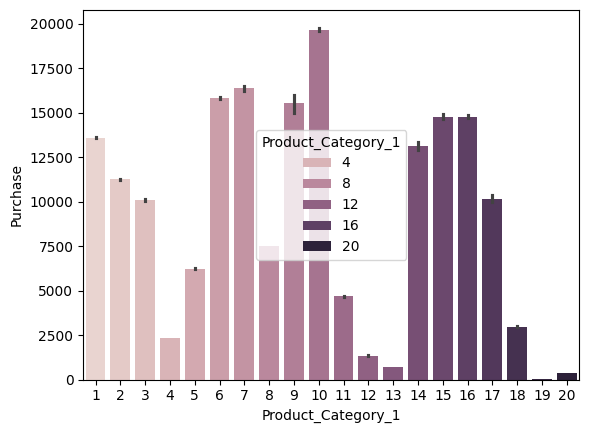

In [89]:
# Plotting with hue to compare categories on the same plot
sns.barplot(x="Product_Category_1", y="Purchase", hue="Product_Category_1", data=df)
plt.show()

#similar for other 2 categories



In [101]:
gender_counts = df['Gender'].value_counts()
print(gender_counts)

Gender
1    590031
0    193636
Name: count, dtype: int64


Text(0.5, 1.0, 'Distribution of Gender')

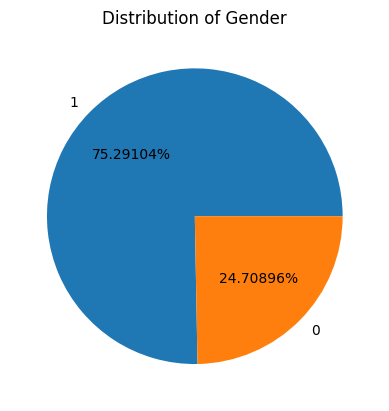

In [108]:
plt.pie(gender_counts, labels=gender_counts.index,autopct='%2.5f%%')
plt.title("Distribution of Gender")